<a href="https://colab.research.google.com/github/likaiwen1128/colab/blob/master/%E2%80%9CPrediction_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

In [0]:
import pandas as pd
import array as array

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/kosukeimai/qss/master/MEASUREMENT/unvoting.csv")
data.head()

,Year,CountryAbb,CountryName,idealpoint,PctAgreeUS,PctAgreeRUSSIA
0,1946,USA,United States of America,1.713689,1.0,0.214286
1,1947,USA,United States of America,1.812884,1.0,0.263158
2,1948,USA,United States of America,1.936166,1.0,0.127451
3,1949,USA,United States of America,1.876619,1.0,0.111111
4,1950,USA,United States of America,1.810646,1.0,0.173077


In [0]:
data1=data.groupby("Year").mean()
data1.head()

,idealpoint,PctAgreeUS,PctAgreeRUSSIA
Year,,,
1946,0.878918,0.584562,0.361673
1947,0.837604,0.621445,0.382649
1948,0.765981,0.577968,0.279465
1949,0.733457,0.540646,0.377212
1950,0.686996,0.634707,0.311865


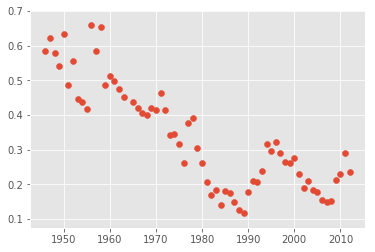

In [0]:
plt.scatter(data1.index, data1.PctAgreeUS)

In [0]:
data2=data1.index.values[:, np.newaxis]
data3=data1.PctAgreeUS[:, np.newaxis]
data4=data3*(10)

In [0]:
def PolynomialRegression(deg=10, **kwargs):
  return make_pipeline(
      PolynomialFeatures(deg),
      LinearRegression( **kwargs)
  )

In [0]:
poly_fit=PolynomialRegression(deg=10)

In [0]:
y_value=poly_fit.fit(data2, data4).predict(data2)

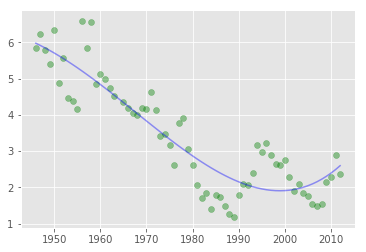

In [0]:
plt.scatter(data2, data4, c="green", alpha=.4)
plt.plot(data2, y_value, c="blue", alpha=.4)

In [0]:
data1.shape

(66, 3)

In [0]:
data2.shape,data3.shape

((66, 1), (66, 1))

In [0]:
degree=np.arange(0, 10)
train_score, val_score = validation_curve(PolynomialRegression(), data2, data3,
                                          'polynomialfeatures__degree',
                                          degree,
                                          cv=4)

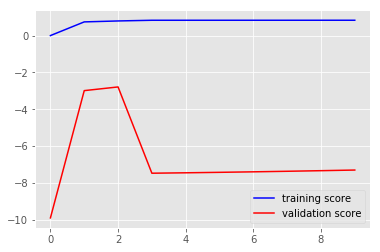

In [0]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
#plt.ylim(1, 7)